In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = ['ID', 'entity', 'sentiment', 'comment']
df = pd.read_csv('twitter_training.csv', header=0, names=column_names)

In [3]:
df.head()

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# EDA

In [4]:
df.shape

(74681, 4)

In [5]:
# Count of unique entities
entity_count = df['entity'].value_counts()
print(entity_count)

entity
Microsoft                            2400
MaddenNFL                            2400
TomClancysRainbowSix                 2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon                               2316
HomeDepot                            2310
PlayStation5(PS5)                    2310
CS-GO                                2304
Cyberpunk2077                        2304
GrandTheftAuto(GTA)        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   entity     74681 non-null  object
 2   sentiment  74681 non-null  object
 3   comment    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# Checking For Duplicates

In [8]:
duplicates = df.duplicated()
duplicated_rows = df[duplicates]
duplicated_rows.count()

,0
ID,2700
entity,2700
sentiment,2700
comment,2340


In [9]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)

# Checking for Missing Values :

In [10]:
df.isnull().sum()

,0
ID,0
entity,0
sentiment,0
comment,326


In [11]:
# Dropping missing value [ Using Dropna]
df = df.dropna()

In [12]:
df.isnull().sum()

,0
ID,0
entity,0
sentiment,0
comment,0


In [13]:
# Number of Unique Values
df.nunique()

,0
ID,12447
entity,32
sentiment,4
comment,69490


Displaying Sample :

In [14]:
for i in range(5):
    print(f"{i+1}: {df['comment'][i]}   ->   {df['sentiment'][i]}")

1: I am coming to the borders and I will kill you all,   ->   Positive
2: im getting on borderlands and i will kill you all,   ->   Positive
3: im coming on borderlands and i will murder you all,   ->   Positive
4: im getting on borderlands 2 and i will murder you me all,   ->   Positive
5: im getting into borderlands and i can murder you all,   ->   Positive


# Sentiment Analysis

In [15]:
df['sentiment'].value_counts()

,count
sentiment,
Negative,21698
Positive,19712
Neutral,17708
Irrelevant,12537


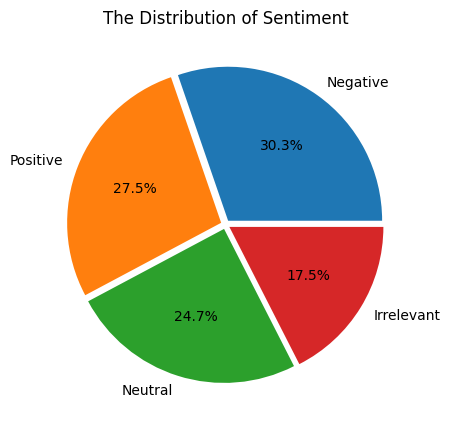

In [16]:
plt.figure(figsize=(10,5))
plt.pie(x=df['sentiment'].value_counts().values,
        labels=df['sentiment'].value_counts().index,
        autopct='%.1f%%', explode=[0.03, 0.03,0.03,0.03])
plt.title('The Distribution of Sentiment')
plt.show()

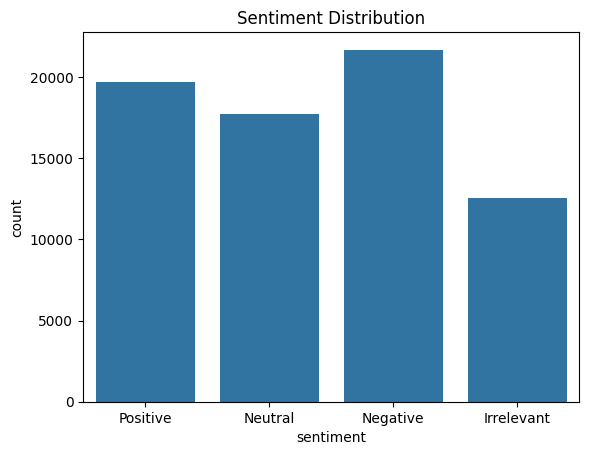

In [17]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

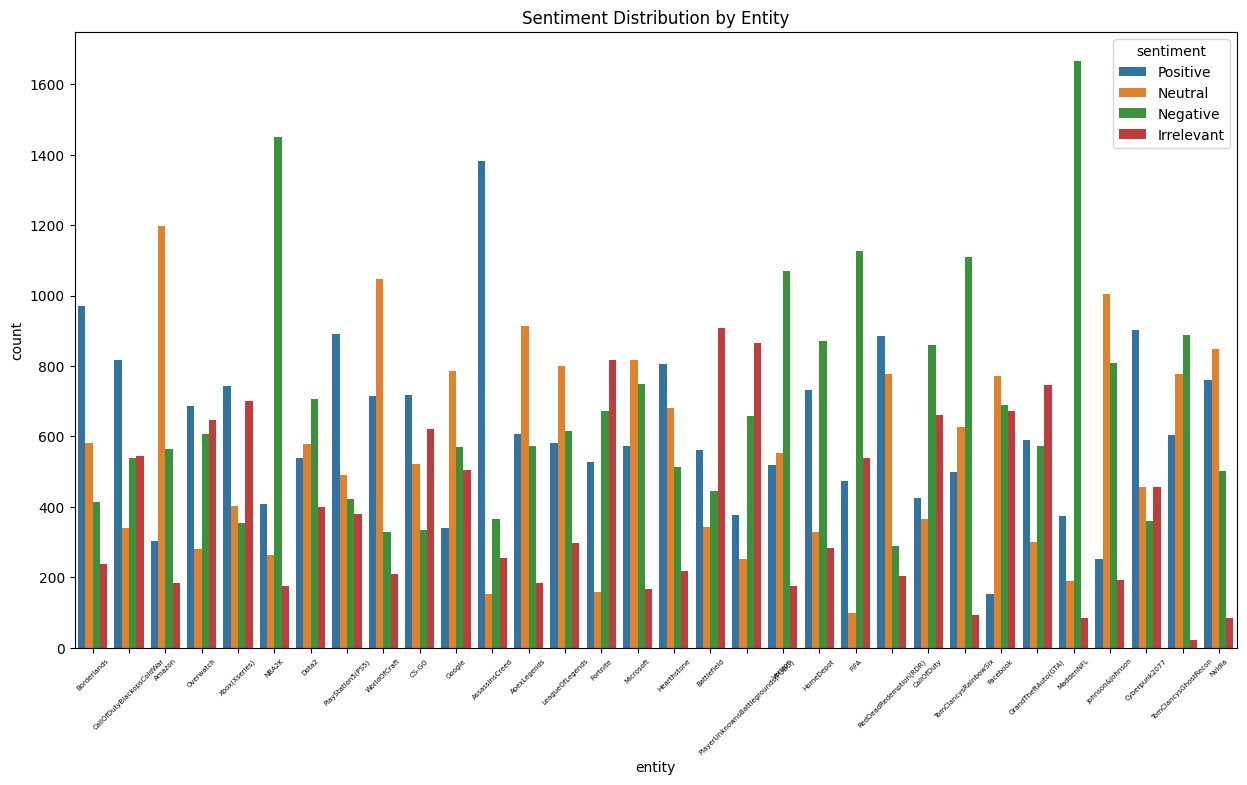

In [18]:
plt.figure(figsize=(15, 8))
sns.countplot(x='entity', hue='sentiment', data=df)
plt.title('Sentiment Distribution by Entity')
plt.xticks(rotation=45, fontsize=5)
plt.show()

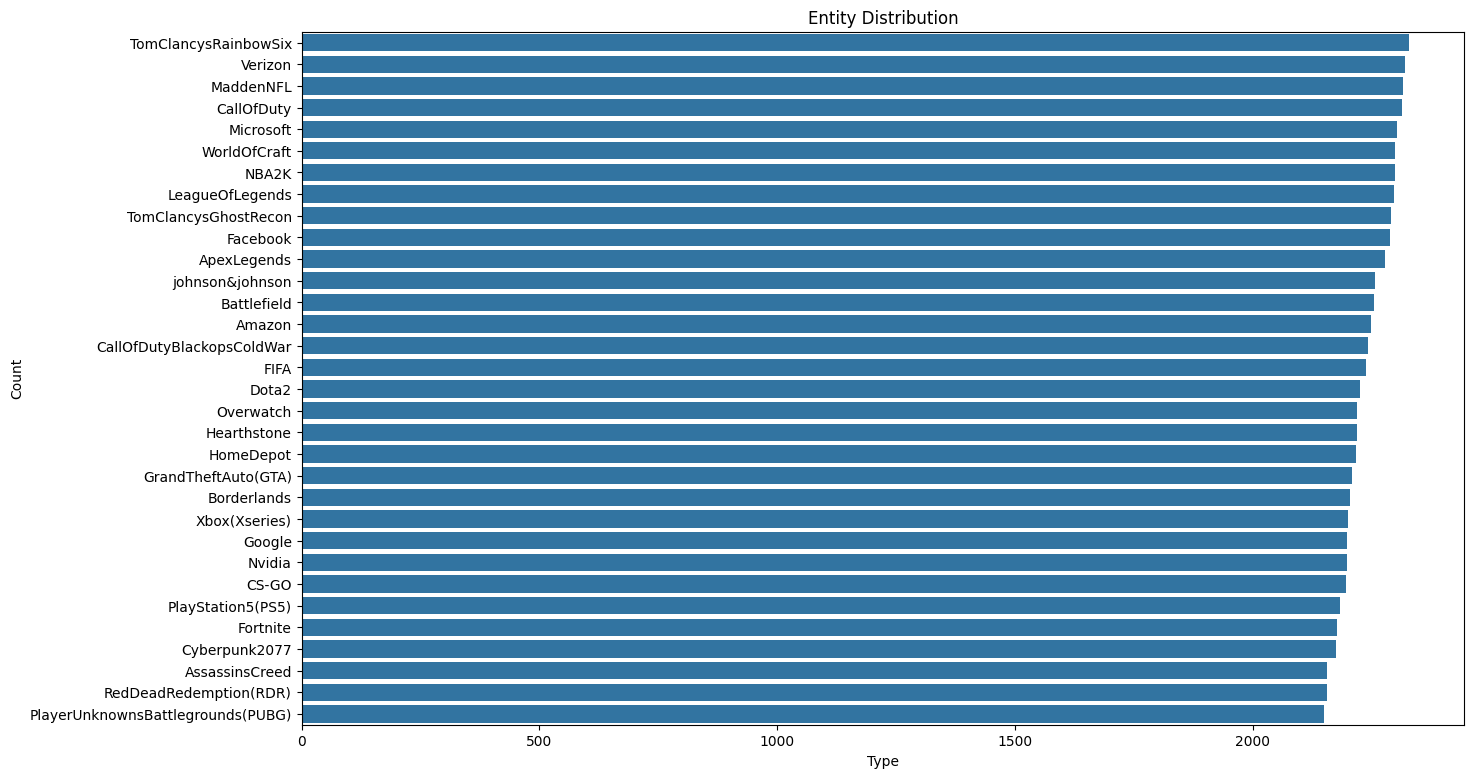

In [19]:
plt.figure(figsize=(15,9))
sns.barplot(x=df['entity'].value_counts().values,y=df['entity'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Entity Distribution')
plt.show()

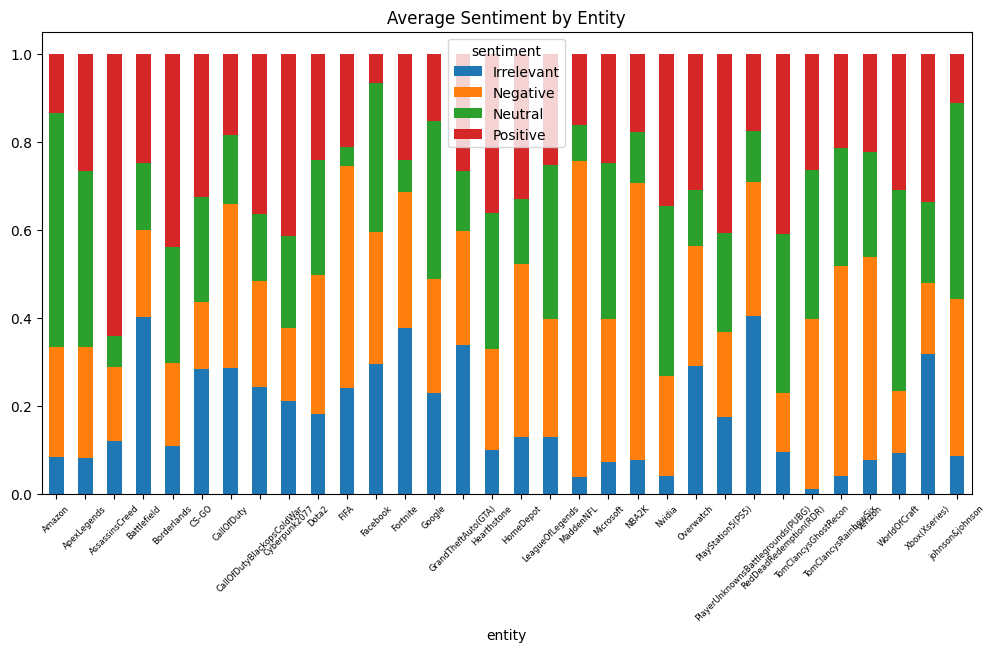

In [20]:
average_sentiment_by_entity = df.groupby('entity')['sentiment'].value_counts(normalize=True).unstack()
average_sentiment_by_entity.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sentiment by Entity')
plt.xticks(rotation=45, fontsize=6)
plt.show()

# Word Cloud

In [ ]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [ ]:
df.head()

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,come border kill
1,2401,Borderlands,Positive,im get borderland kill
2,2401,Borderlands,Positive,im come borderland murder
3,2401,Borderlands,Positive,im get borderland murder
4,2401,Borderlands,Positive,im get borderland murder


In [ ]:
#!pip install wordcloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS
wc = WordCloud(width=800,height=500,min_font_size=10,background_color='white')

# Positive Sentiment Word Cloud:



In [ ]:
from PIL import Image, ImageDraw, ImageFont

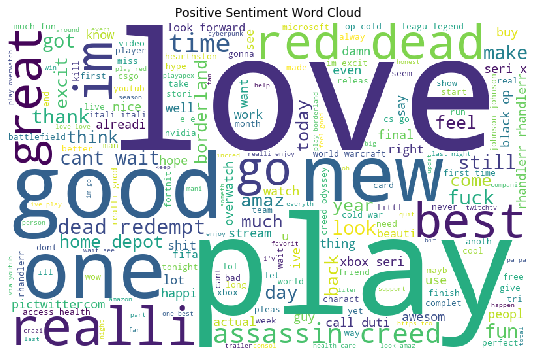

In [ ]:
positive_data = df[df['sentiment'] == 'Positive']['comment'].str.cat(sep=" ")

# Exclude the word "game" from the text data
positive_data = positive_data.replace("game", "")
if positive_data:
    wc = WordCloud(width=800, height=500, background_color='white').generate(positive_data)
    plt.figure(figsize=(12, 6))
    plt.title('Positive Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for positive sentiment.")

# Negative Sentiment Word Cloud:

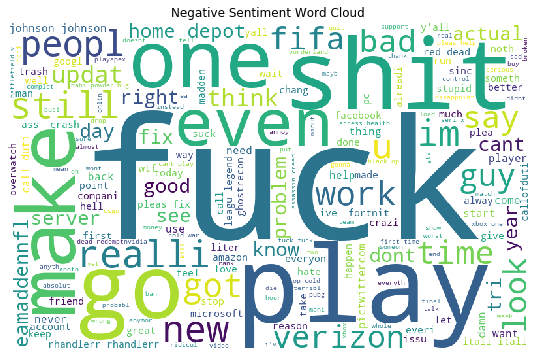

In [ ]:
negative_data = df[df['sentiment'] == 'Negative']['comment'].str.cat(sep=" ")

# Exclude the word "game" from the text data
negative_data = negative_data.replace("game", "")
if negative_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(negative_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for negative sentiment.")

# Neutral Sentiment Word Cloud:

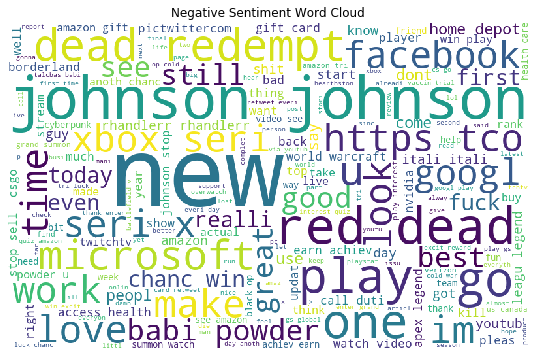

In [ ]:
neutral_data = df[df['sentiment'] == 'Neutral']['comment'].str.cat(sep=" ")

# Exclude the word "game" from the text data
neutral_data = neutral_data.replace("game", "")
if neutral_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(neutral_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for neutral sentiment.")

# Irrelevant Sentiment Word Cloud:

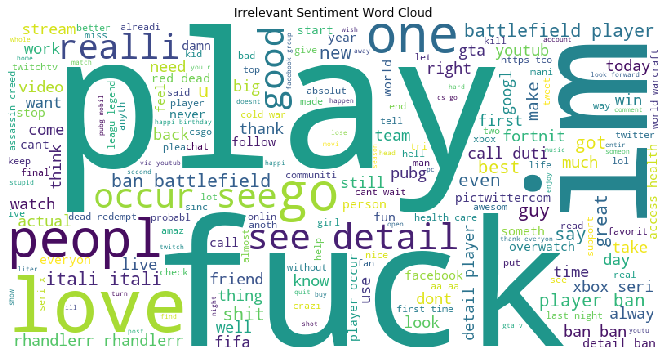

In [ ]:
irrelevant_data = df[df['sentiment'] == 'Irrelevant']['comment'].str.cat(sep=" ")

irrelevant_data = irrelevant_data.replace("game", "")

if irrelevant_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(irrelevant_data)
    plt.figure(figsize=(12, 6))
    plt.title('Irrelevant Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for irrelevant sentiment.")
